# Model-Free Policy Evaluation

provided by [Stanford CS234](https://www.youtube.com/watch?v=FgzM3zpZ55o)

---

<div class="alert alert-block alert-info">
Table of Contents: <br>
    
<ul>
    <li>1. <a href="#1.-Introduction">Introduction</a></li>
    <li>2. <a href="#2.-Monte-Carlo-(MC)-Policy-Evaluation">Monte Carlo (MC) Policy Evaluation</a></li>
    <li>3. <a href="#3.-Temporal-Difference-(TD)-Learning">Temporal Difference (TD) Learning</a></li>
    <li>4. <a href="#4.-Comparing-Approaches">Comparing Approaches</a></li>
    <li>5. <a href="#5.-Resource">Resource</a></li>
</ul>
</div>

# 1. Introduction

Last time we covered policy evaluation & control with a true model of the world (environment). This lecture will cover policy evaluation (no control!) without known dynamics & reward models. Next time, we will cover control for this case.

Here are our definitions:

$$
G_{t} = r_{t} + \gamma r_{t + 1} + ... \\
V^{\pi}(s) = \mathbb{E}_{\pi}[G_{t}~|~s_{t} = s] = \mathbb{E}_{\pi}[r_{t} + \gamma r_{t + 1} + ...~|~s_{t} = s] \\
Q^{\pi}(s, a) = \mathbb{E}_{\pi}[G_{t}~|~s_{t} = s, a_{t} = a] = \mathbb{E}_{\pi}[r_{t} + \gamma r_{t + 1} + ...~|~s_{t} = s, a_{t} = a]
$$

Remember the dynamic programming approach to evaluating a policy for a finite MDP.

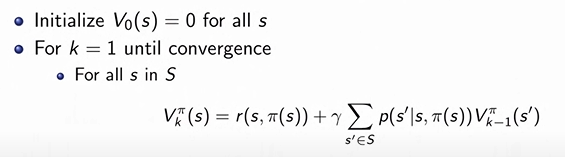 <br>
_Figure 1. Dynamic Programming for evaluation._

We can think of $V^{\pi}_{k}(s)$ as an exact value of the k-horizon value of state $s$ under policy $\pi$. And we can say it's an estimate of the infinite horizon for state $s$ under policy $\pi$.

$$
V^{\pi}(s) = \mathbb{E}_{\pi}[G_{t}~|~s_{t} = s] \approx \mathbb{E}_{\pi}[r_{t} + \gamma V_{k - 1}~|~s_{t} = s]
$$

This is formalized in the above equation.

<center><img src="https://imgur.com/DnDgOZJ.jpg" alt="drawing"/></center>
_Figure 2. DP tree for evaluation._

We can think of the DP approach for evaluation as a tree where a state is followed by an action which can lead to a variable number of other states (which also have their corresponding actions). The point here is that we are __bootstrapping__. This means we are replacing the expected return by its estimate. 

# 2. Monte Carlo (MC) Policy Evaluation

Okay, notation is about to get a little nuanced. But this isn't the end of the road! Most notations can be omitted. They are there to highlight something. With that, let's take a look at the value function under a certain policy $\pi$. 

$$
V^{\pi}(s) = \mathbb{E}_{T \sim \pi}[G_{t}~|~s_{t} = s] \hspace{1em} (Eq.~1)\\
$$

It is the same as before, but now we specify that we sample a trajectory following policy $\pi$.

> __Monte Carlo Policy Evaluation__ : a model-free (model here means the ground truth dynamics model of the environment) policy evaluation method

Requirements for MC Policy Evaluation:

* trajectories/episodes need to be finite (need to be episodic)
* no bootstrapping (just sampling)
* does not assume state is markov

Let's take a look at 2 different monte carlo methods for model-free policy evaluation.

> __First-Visit MC__ : a version of monte carlo policy evaluation that updates the value function with the first time $t$ that state $s$ is visited in episode $i$

> __Every-Visit MC__ : a version of monte carlo policy evaluation that updates the value function with the with every time $t$ that state $s$ is visited in episode $i$

Below is the algorithm for First-Visit:

Initialize $N(s) = 0, G(s) = 0 ~~ \forall s \in S$ <br>
Loop <br>
$\quad$ Sample episode $i = s_{i, 1}, a_{i, 1}, r_{i, 1}, s_{i, 2}, a_{i, 2}, r_{i, 2}, ..., s_{i, T_{i}}$
<br>
$\quad$ Define $G_{i, t} = r_{i, t} + \gamma r_{i, t + 1} + \gamma^{2} r_{i, t + 2} + ... \gamma^{T_{i} - 1} r_{i, T_{i}}$ for the $ith$ episode at time step $t$ <br>
$\quad$ For each state $s$ visited in episode $i$ <br>
$\quad\quad$ For __first__ time $t$ that state $s$ is visited in episode $i$ <br>
$\quad\quad\quad$ Increment counter of total first visits: $N(s) = N(s) + 1$ <br>
$\quad\quad\quad$ Increment total return $G(s) = G(s) + G_{i, t}$ <br>
$\quad\quad\quad$ Update estimate $V^{\pi}(s) = G(s)/N(s)$ <br>
<br>
_Algorithm 1. First-Visit Monte Carlo_

<center><img src="https://imgur.com/mopfDoZ.jpg" alt="drawing"/></center>

_Figure 1. Bias and variance and MSE._

Simply put, the bias is the difference between the expected value of the statistic $\hat{\theta}$ and the true statistic $\theta$. The variance is the expected squared difference between the $\hat{\theta}$ and the expected $\hat{\theta}$. The MSE is simply a combination of these 2.

* $V^{\pi}$ is an _unbiased_ estimator of true $\mathbb{E}_{\pi}[G_{t}~|~s_{t}=s]$. <br>
* By the law of large numbers, as the count for First-Visit MC approaches infinity, the value estimates would also approach the expected value estimates under that same policy: $N(s) \rightarrow \infty, V^{\pi}(s) \rightarrow \mathbb{E}_{\pi}[G_{t}~|~s_{t} = s]$.

Initialize $N(s) = 0, G(s) = 0 ~~ \forall s \in S$ <br>
Loop <br>
$\quad$ Sample episode $i = s_{i, 1}, a_{i, 1}, r_{i, 1}, s_{i, 2}, a_{i, 2}, r_{i, 2}, ..., s_{i, T_{i}}$
<br>
$\quad$ Define $G_{i, t} = r_{i, t} + \gamma r_{i, t + 1} + \gamma^{2} r_{i, t + 2} + ... \gamma^{T_{i} - 1} r_{i, T_{i}}$ for the $ith$ episode at time step $t$ <br>
$\quad$ For each state $s$ visited in episode $i$ <br>
$\quad\quad$ For __every__ time $t$ that state $s$ is visited in episode $i$ <br>
$\quad\quad\quad$ Increment counter of total first visits: $N(s) = N(s) + 1$ <br>
$\quad\quad\quad$ Increment total return $G(s) = G(s) + G_{i, t}$ <br>
$\quad\quad\quad$ Update estimate $V^{\pi}(s) = G(s)/N(s)$ <br>
<br>
_Algorithm 2. Every-Visit Monte Carlo_

This is the exact same as the First Visit MC except it is done for every visit. In this case:

* $V^{\pi}$ for every-visit MC is _biased_ because now a state in one episode that occurs too often will be given a lot more priority. 
*It often has better MSE than first-visit and is a consistent estimator.

> __Incremental MC__ : an approach that can be layered on top of the previous MC methods to incrementally update the value estimate function

After each episode $i$ <br>
$\quad$ Define $G_{i, t}$ <br>
$\quad$ For each state $s$ visited in episode $i$ <br>
$\quad\quad$ For a time $t$ that state $s$ is visited in episode $i$ <br>
$\quad\quad\quad$ Increment counter of total first visits: $N(s) = N(s) + 1$ <br>
$\quad\quad\quad$ Update estimate $V^{\pi}(s) = V^{\pi}(s) + \alpha(G_{i, t} - V^{\pi}(s))$ <br>
<br>
_Algorithm 3. Incremental Monte Carlo._

* $\alpha = \frac{1}{N(s)}$: every-visit MC
* $\alpha > \frac{1}{N(s)}$: forget older data, good for non-stationary domains (when the MDP is constantly changing)

The general limitations of MC methods:
* they require episodes to terminate at some point
* they generally have high variance

MC methods:
* don't bootstrap and instead, samples
 * converges to true value under some assumptions

# 3. Temporal Difference (TD) Learning

> __Temporal Difference (TD) Learning__ : combines MC methods (sampling) and dynamic programming methods (bootstrapping)

* the TD family of methods are model-free (much like the MC methods)
* they bootstrap and sample (so they do what dynamic programming and MC do)
* can be used in both episodic and infinite-horizon settings (unlike MC which can be used only in episodic settings)
* updates for eery state, action, reward, next_state tuple

Set $\alpha$ <br>
Initialize $V^{\pi}(s) = 0, \forall s \in S$ <br>
Loop <br>
$\quad$ Sample __tuple__ $(s_{t}, a_{t}, r_{t}, s_{t + 1})$ <br>
$\quad$ $V^{\pi}(s_{t}) = V^{\pi}(s_{t}) + \alpha([r_{t} + \gamma V^{\pi}(s_{t + 1})] - V^{\pi}(s_{t}))$ <br>

_Algorithm 4. TD Learning TD(0)._

We call it TD(0) because we take the initial reward (via sampling every-visit if $\alpha = \frac{1}{N(s)}$) and we bootstrap. Notice how similar it is to the dynamic programming approach and the MC approach. 

The __TD error__ is:

$$
\delta_{t} = [r_{t} + \gamma V^{\pi}(s_{t + 1})] - V^{\pi}(s_{t})
$$

# 4. Comparing Approaches

<center><img src="https://imgur.com/sgeZy75.jpg" alt="drawing"/></center>

_Figure 2. Comparing different approaches._

We pick different model-free policy evaluation algorithms based on:

* bias/variance trade-offs
* data efficiency
* computational efficiency

MC is:
* unbiased
* high variance
* converges to true even with function approximation

TD is:
* moderate bias
* lower variance
* converges if tabular representation

<center><img src="https://imgur.com/MaMUCeC.jpg" alt="drawing"/></center>

_Figure 3. Data & Computational efficiency of model-free policy evaluation algorithms._

# 5. Resource

If you missed the link right below the title, I'm providing the resource here again along with the course website.

- [Stanford CS234](https://www.youtube.com/watch?v=FgzM3zpZ55o)
- [Course Website](http://web.stanford.edu/class/cs234/index.html)

This is a series of 15 lectures provided by Stanford.
